# Task 2, Homework 3 - Machine Learning
## Implement Logistic Regression
Use derivations form previous task to perform logistic regression. Provide a custom implemntation of gradient descent for this taks.
**Bonus points** provide also implementation of other optimization algorithm of your choice, eg. Newton-Rhapson method.

## Main part

### Equations from task 1
We will use equations from previous task. We will leverage gradient of the log-likelihood function that we found earlier:

$$
\nabla \log L(\beta) = \sum_{i=1}^{N} \left( y_i - S(x_i \beta) \right) x_i
$$

### How it will be done?
- Initialize the weights to zeroes
- In loop, until amount of iterations is reached:
  - Compute predictions with sigmoid function
  - Compute gradient
  - Update the weights with respect to learning rate


$\beta \leftarrow \beta + \eta \cdot \nabla \log L(\beta)$ ($\eta$ = learning rate)

### Gradient descent function
Function will be taking parameters:
- X: Feature matrix (N x K)
- y: Target vector (N x 1)
- learning_rate: Learning rate for gradient updates
- iterations: Number of iterations

Returns: $\beta$ (N x 1) learned coefficients


In [15]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    N, K = X.shape
    beta = np.zeros(K)
    
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, beta))
        gradient = np.dot(X.T, (y - predictions)) / N
        beta += learning_rate * gradient
    return beta

### Example code to test implementation - visualizing a decision boundary

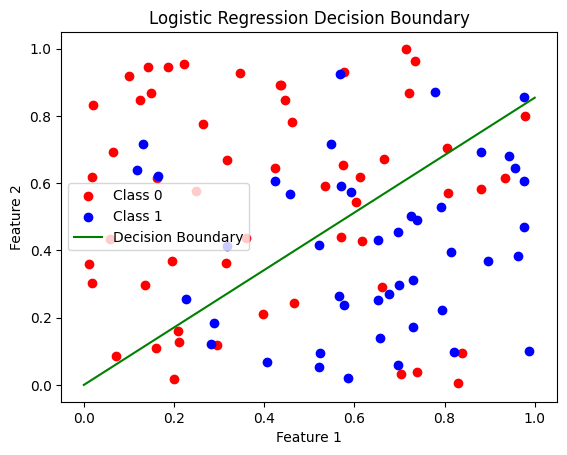

In [16]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
X = np.random.rand(100, 2)
y = (np.dot(X, [2, -1]) + np.random.randn(100) > 0.5).astype(int)

beta = gradient_descent(X, y, learning_rate=0.1, iterations=5000)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')

x_values = np.linspace(0, 1, 100)
decision_boundary = -(beta[0] / beta[1]) * x_values
plt.plot(x_values, decision_boundary, label='Decision Boundary', color='green')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

plt.show()

## Bonus points part
In bonus part, we implement Newton-Raphson optimization (Think of Newton Approximation Method from Numerical Analysis Course)

Function takes:
Function will be taking parameters:
- X: Feature matrix (N x K)
- y: Target vector (N x 1)
- learning_rate: Learning rate for gradient updates
- iterations: Number of iterations

Returns: $\beta$ learned coefficients

In main function loop, there are 5 steps:

- Computing preditions using sigmoid function
  - $p = \sigma(X \beta) = \frac{1}{1 + e^{-X \beta}}$
- Computing gradient (first derivative)
  - $\nabla \log L(\beta) = X^T (y - p)$
- Then we generate diagonal weight matrix
  - $W = \text{diag}(p_i (1 - p_i))$
- Use weight matrix to compute Hessian matrix
  - $H(\beta) = -X^T W X$
- Update beta using Newton-Raphson step
  - $\beta_{\text{new}} = \beta_{\text{old}} - H(\beta)^{-1} \nabla \log L(\beta)$


In [12]:
def newton_raphson(X, y, iterations=10):
    N, K = X.shape
    beta = np.zeros(K)
    
    for _ in range(iterations):
        p = sigmoid(X @ beta)
        gradient = X.T @ (y - p)
        W = np.diag(p * (1 - p))
        hessian = -(X.T @ W @ X)
        beta -= np.linalg.inv(hessian) @ gradient
    
    return beta


### Testing Newton-Raphson Code
Reused test code from previous task

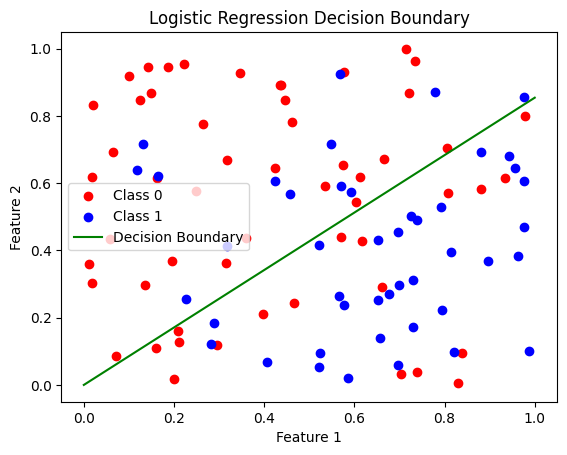

In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
X = np.random.rand(100, 2)
y = (np.dot(X, [2, -1]) + np.random.randn(100) > 0.5).astype(int)

beta = newton_raphson(X, y, iterations=5000)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')

x_values = np.linspace(0, 1, 100)
decision_boundary = -(beta[0] / beta[1]) * x_values
plt.plot(x_values, decision_boundary, label='Decision Boundary', color='green')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

plt.show()

## Conclussion
We reach desired result with both methods - Newton needs less iterations but is more computationally expensive, while gradient descent is simpler in implementation